### S07 T01: Tasca del test d'hipòtesis

In [1]:
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu, shapiro
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
import warnings
warnings.filterwarnings('ignore')

For this exercise I will use the same dataset as in the previous exercises. The dataset contains information about athletes competing in the Olympic Games, both Winter and Summer Season from Athens 1896 to Rio 2016. 

This dataset is taken from: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
# loading the dataset 
games = pd.read_csv('athlete_events.csv')

In [3]:
games.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.000,180.000,80.000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.000,170.000,60.000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.000,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.000,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.000,185.000,82.000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# check missing values
games.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In this exercise I'm interested in comparing the 'Age', 'Weight' and 'Weight' among different groups of athletes, so this time we will delete all rows that have missing values in these rows. 

<AxesSubplot:>

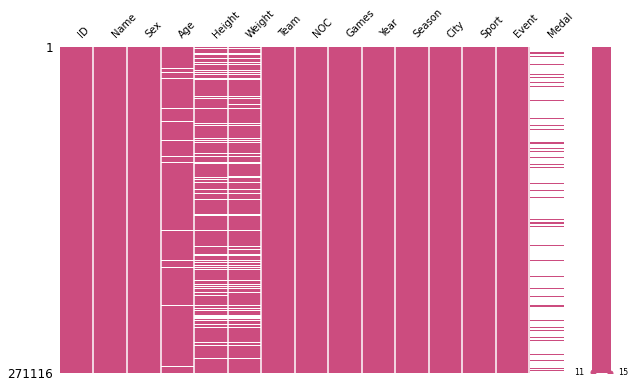

In [5]:
# show missing values and how they are distributed in the dataset 
import missingno as msno
msno.matrix(games, color=(0.8, 0.3, 0.5), figsize=(10,6),fontsize=(10))

In [6]:
#deleting null values from columns Age, Height, Weight
games = games.dropna(subset = ['Age', 'Height', 'Weight'])

In [7]:
games.shape

(206165, 15)

This dataset contains some duplicate athletes because some of them compete in different competitions and even different games. For this exercise we will delete these duplicate athletes because we want to focus on athletes attributes and we want the data to be truly independent. 

In [8]:
# delete duplicates by ID column, ID is unique for each athlete
df = games.drop_duplicates(subset= ['ID'], keep= 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99088 entries, 0 to 271114
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      99088 non-null  int64  
 1   Name    99088 non-null  object 
 2   Sex     99088 non-null  object 
 3   Age     99088 non-null  float64
 4   Height  99088 non-null  float64
 5   Weight  99088 non-null  float64
 6   Team    99088 non-null  object 
 7   NOC     99088 non-null  object 
 8   Games   99088 non-null  object 
 9   Year    99088 non-null  int64  
 10  Season  99088 non-null  object 
 11  City    99088 non-null  object 
 12  Sport   99088 non-null  object 
 13  Event   99088 non-null  object 
 14  Medal   13507 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 12.1+ MB


In [9]:
df[['Age', 'Height', 'Weight']].describe()

,Age,Height,Weight
count,"99,088.000","99,088.000","99,088.000"
mean,23.928,176.367,71.960
std,4.718,10.386,14.553
min,11.000,127.000,25.000
25%,21.000,170.000,62.000
50%,23.000,176.000,71.000
75%,26.000,183.000,80.000
max,68.000,226.000,214.000


### - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In this exercise, we want to **test if the average age of Gymnastics Athletes is less than the average age of the rest of the Olympic Athletes.**

In [10]:
#To make the test really independent, we´calcualte the mean of age of athletes excluding Gymnastics athletes:
data_no_gymnastics = df[df['Sport'] != 'Gymnastics']
print('Average age for Olympic athletes(excluding Gymnastics) is: ',round(data_no_gymnastics.Age.mean(), 3))

Average age for Olympic athletes(excluding Gymnastics) is:  24.013


In [11]:
# create a new dataframe for Gymnastics athletes: 
data_gymnastics = df[df['Sport'] == 'Gymnastics']
data_gymnastics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
41,17,Paavo Johannes Aaltonen,M,28.000,175.000,64.000,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
139,51,Nstor Abad Sanjun,M,23.000,167.000,64.000,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
437,244,Raouf Abdelraouf,M,22.000,167.000,63.000,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Men's Individual All-Around,NaN
676,394,Irene Abel,F,19.000,160.000,48.000,East Germany,GDR,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Individual All-Around,NaN
687,396,Katja Abel,F,25.000,165.000,55.000,Germany,GER,2008 Summer,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Individual All-Around,NaN


First let´s check the distribution of the ages for Gymnastics Athletes, we can do a test to check if it follows a normal distribution. We will use the **Shapiro-Wilk Normality Test**. Our Hypothesis is: 

+ H₀: The data is normally distributed.
+ H₁: The data is not normally distributed.

In [12]:
# create a function that checks if the distribution is normal: 
def check_normal_distribution(data): 
    stat, p_value_norm = shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p_value_norm))
    
    if p_value_norm < 0.05 : 
        print("Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed")
    else: 
        print("Fail to reject null hypothesis at 95€ Significance Level  >> The data is normally distributed")

In [13]:
check_normal_distribution(data_gymnastics['Age'])

stat=0.963, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed


The result of the test is that with a confidence level of 95% the data is not normally distributed, so I will use the **Wilcoxon test**, that allows to make Hypothesis testing with one non parametric sample.

Fist, we´ll declare our Hypothesis, I want to test wether **average age of Gymnastic athletes is less than the rest of Olympic athletes:**

+ H₀: Average age for Gymnastic athletes ≥ 24.01 (Olympic athletes average age)
+ H₁: Average age for Gymnastic athletes < 24.01 (Olympic athletes average age)

In [14]:
# one sample wilcoxon-test
# since this is a one sided test we use the parameter 'less', alternative Hypothesis is age is less than athletes avg 
stat, pvalue = wilcoxon(data_gymnastics['Age'] - data_no_gymnastics.Age.mean(), 
                        alternative = 'less')

print("One-sample Wilcoxon-test p-value=%.3f " % pvalue)

alpha = 0.05

if pvalue > alpha: 
    print('Fail to reject Null Hypothesis at 95% confidence level ')
else: 
    print('Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis')

One-sample Wilcoxon-test p-value=0.000 
Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis


So we can conclude that **age of Gymnastics Athletes is less than 24.01** (average age of athletes in the Olympic Games).

We can plot this distribution to see if it confirms the result of our test:

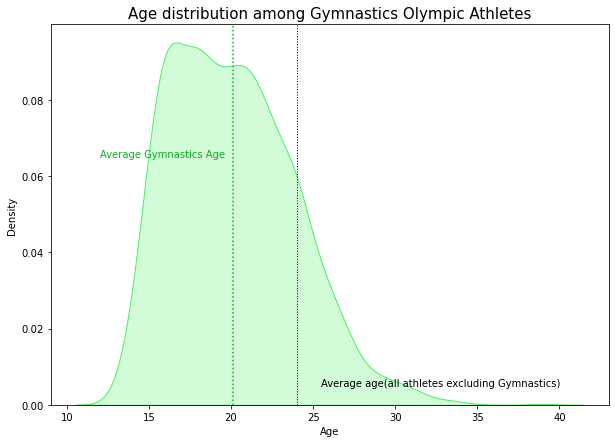

In [15]:
plt.figure(figsize= (10,7))

sns.kdeplot(data_gymnastics['Age'], label= 'Age', color= '#4cf163', fill = True)
plt.axvline(x= data_no_gymnastics.Age.mean(), linewidth = 1, color= 'black', ls= 'dotted')
plt.axvline(x= data_gymnastics['Age'].mean(), color = '#08b01f', ls = 'dotted')
plt.text(x= 25.5, y=0.005, s= "Average age(all athletes excluding Gymnastics)")
plt.text(x= 12, y = 0.065, s= 'Average Gymnastics Age', color= '#08b01f')
plt.title('Age distribution among Gymnastics Olympic Athletes', size = 15)
plt.show()

Seeing this plot we can confirm the result of our test that accepts Alternative Hypothesis: age of athletes in Gymnastics is less than athletes in the rest of the Sports. 

### - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Now we want to test if the **height of the athletes has changed in the last 50 years** so we will compare the heights of the athletes in the 50's decade with the heights of the 2000's decade to see if there's a significant difference.

In [16]:
# create a dataframe with ahtletes of 50's decade: 
data_50 = df[(df['Year'] >= 1950 ) & (df['Year'] < 1960 )]
data_50.shape

(2171, 15)

In [17]:
# dataframe for athletes in the 2000's decade: 
data_2000 = df[(df['Year'] >= 2000 ) & (df['Year'] < 2010 )]
data_2000.shape

(23163, 15)

Since the dataframes have different sizes, we´ll take a sample of 600 athletes from each dataframe. 

We´ll do an **stratified sample** by column 'Sex', since there is difference in height between Male and Female athletes we want the samples to be proportional so this doesn' t cause a distorsion in the results. We´ll take **2 samples of 600 athletes with 300 male and 300 female each.**

In [18]:
# doing a stratified sample 
data_50_sampled = data_50.groupby('Sex', group_keys= False).apply(lambda x: x.sample(300, random_state = 42))
data_2000_sampled = data_2000.groupby('Sex', group_keys= False).apply(lambda x: x.sample(300, random_state = 42))

In [19]:
data_50_sampled.Sex.value_counts()

F    300
M    300
Name: Sex, dtype: int64

In [20]:
data_2000_sampled.Sex.value_counts()

F    300
M    300
Name: Sex, dtype: int64

Nos let´s test if these samples follow a normal distribution: 

+ H₀: The data is normally distributed.
+ H₁: The data is not normally distributed.

In [21]:
# again we'll use the Shapiro-Wilk Normality Test
check_normal_distribution(data_50_sampled['Height'])
check_normal_distribution(data_2000_sampled['Height'])

stat=0.989, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
stat=0.996, p=0.097
Fail to reject null hypothesis at 95€ Significance Level  >> The data is normally distributed


The result is that one of the samples follows a normal distribution but not the other, so this time we´ll use the non parametric **Mann-Whitney U Test.**

Let´s state our Hypothesis: 

$H_{0}$: $\mu_{1}= \mu_{2}$  **or** $\mu_{1}- \mu_{2} = 0 $  **or** The mean of the samples are same.      
$H_{1}$: $\mu_{1} \neq \mu_{2}$  **or** $\mu_{1}- \mu_{2} \neq 0 $  **or** The mean of the samples are different.

In [22]:
# this time we'll use a two sided test
stat, pvalue = stats.mannwhitneyu(data_50_sampled['Height'],data_2000_sampled['Height'], alternative = 'two-sided')
print("p-value:%.3f" % pvalue)

alpha = 0.05

if pvalue > alpha: 
    print('Fail to reject Null Hypothesis at 95% confidence level ')
else: 
    print('Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis')

p-value:0.000
Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis


With a significance level of 95% we can **reject the null Hypothesis that the heights of the athletes has stayed the same in the last 50 years.**

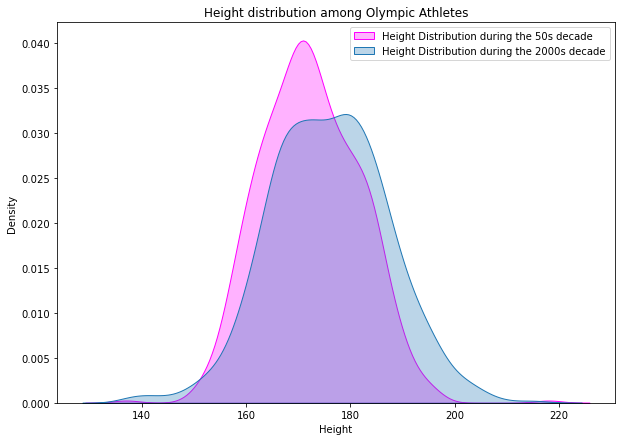

In [23]:
# let´s plot the distribution of heights to see this: 

plt.figure(figsize= (10,7))

sns.kdeplot(data_50_sampled['Height'], label= 'Height Distribution during the 50s decade', 
                                     color= 'magenta', fill = True, alpha = 0.30)
sns.kdeplot(data_2000_sampled['Height'],  label= 'Height Distribution during the 2000s decade', 
            fill = True, alpha= 0.30)
plt.title('Height distribution among Olympic Athletes')
plt.legend()
plt.show()

We can confirm the results of our test, data has different distribution and means are different: 

+ 2000's athletes distribution has a smoother curve, the data is more dispersed. 
+ For 50's athletes, the data is more concentrated around the mean. 


Although we've already seen that the 50's data is not normally distributed, it´s usual to use the t Student test if the samples are bigger than 30, so **we will repeat the test using T Student test** to check if the results stay the same: 

In [24]:
stat, pvalue = ttest_ind(data_50_sampled['Height'],data_2000_sampled['Height'])

print('stat=%.3f, p=%.3f' % (stat, pvalue))

alpha = 0.05

if pvalue > alpha: 
    print('Fail to reject Null Hypothesis at 95% confidence level ')
else: 
    print('Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis')

stat=-5.992, p=0.000
Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis


The **result with the t Student test is the same as the Mann-Withney U test**: Reject the null hypotesis that athletes heights has stayed the same. 

### - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.


This time we want to compare the weights of female athletes in different Sports: we will **test if the weight of female athletes that compete in 'Swimming', 'Synchronized Swimming' and 'Water Polo' is the same.**

In [25]:
# creating a new dataframe for each Sport
data_swimming = df[(df['Sport'] == 'Swimming') & (df['Sex'] == 'F')]
data_synco_swimming = df[(df['Sport'] == 'Synchronized Swimming') & (df['Sex'] == 'F')]
data_water_polo = df[(df['Sport'] == 'Water Polo') & (df['Sex'] == 'F')]

To do the test, we´ll take a sample of 250 athletes for each sport. This time, we´ll use a **random sample.**

In [26]:
data_swimming_sampled = data_swimming.sample(n= 250, random_state= 42)
data_synco_swimming_sampled = data_synco_swimming.sample(n=250, random_state=42)
data_water_polo_sampled = data_water_polo.sample(n=250, random_state=42)

In [27]:
# check if the samples folow a normal distribution: 
check_normal_distribution(data_swimming_sampled['Weight'])
check_normal_distribution(data_synco_swimming_sampled['Weight'])
check_normal_distribution(data_water_polo_sampled['Weight'])

stat=0.985, p=0.011
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
stat=0.858, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed
stat=0.929, p=0.000
Reject null hypothesis at 95% Significance Level  >> The data is not normally distributed


There are three groups, but the normality assumption is violated. So, we will use the **Friedman Test** for non parametric distributions. Let´s define the Hyopthesis: 

+ H₀: μ₁=μ₂=μ₃ or The mean of the samples is the same.
+ H₁: At least one of them is different.

In [28]:
test_stat,p_value = stats.friedmanchisquare(data_swimming_sampled['Weight'],data_synco_swimming_sampled['Weight'], 
                                           data_water_polo_sampled['Weight'])
print("p value:%.3f" % p_value)

alpha = 0.05

if pvalue > alpha: 
    print('Fail to reject Null Hypothesis at 95% confidence level ')
else: 
    print('Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis')

p value:0.000
Reject Null Hypothesis at 95% confidence level >> Accept Alternative Hypothesis


At this significance level, at **least one of the samples** has a different performance.

We´ll use the  nonparametric version of the **Posthoc test** two compare the samples between them: 

In [29]:
data = np.array([data_swimming_sampled['Weight'],data_synco_swimming_sampled['Weight'], 
                                           data_water_polo_sampled['Weight']]) 
posthoc_df=sp.posthoc_wilcoxon(data, p_adjust="holm")

group_names= ["Swimming", "Syncro Swimming","Water Polo"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")


,Swimming,Syncro Swimming,Water Polo
Swimming,1.000000,0.000000,0.000000
Syncro Swimming,0.000000,1.000000,0.000000
Water Polo,0.000000,0.000000,1.000000


We can see in this table that the three distributions are quite different from each other, we reject Null Hypothesis in all comparisons. Let's plot them to take a better view: 

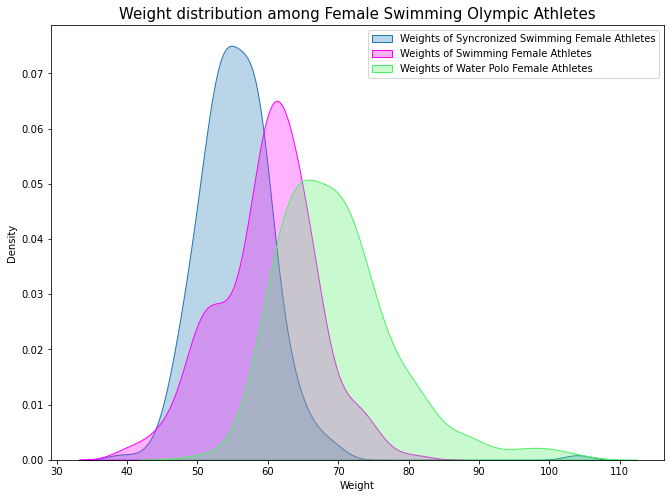

In [30]:
plt.figure(figsize= (11,8))

sns.kdeplot(data_synco_swimming_sampled['Weight'],  label= 'Weights of Syncronized Swimming Female Athletes', 
            fill = True, alpha= 0.30)
sns.kdeplot(data_swimming_sampled['Weight'], label= 'Weights of Swimming Female Athletes', 
                                     color= 'magenta', fill = True, alpha = 0.30)
sns.kdeplot(data_water_polo_sampled['Weight'], label= 'Weights of Water Polo Female Athletes', 
            fill = True, alpha= 0.30, color='#4cf163')
plt.title('Weight distribution among Female Swimming Olympic Athletes', fontsize = 15)
plt.legend()
plt.show()

The plot confirms the result of our tests: weight of female athletes in the 3 sports (Swimming, Syncronized Swimming and Water Polo) is different. 